In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [4]:
df=pd.read_csv('heart.csv')

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
df.describe(include='object').T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [35]:
df['ChestPainType'].unique() #TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [36]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [37]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [38]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [43]:
cat_obj_=['Sex','ExerciseAngina'] #nominal encoding or one hot encoding to be used when rank is not preferred

In [44]:
ordinal_obj=['ChestPainType','ST_Slope','RestingECG'] #ordinal object or label encoding shall be used as ranks are important

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [13]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [14]:
import seaborn as sns

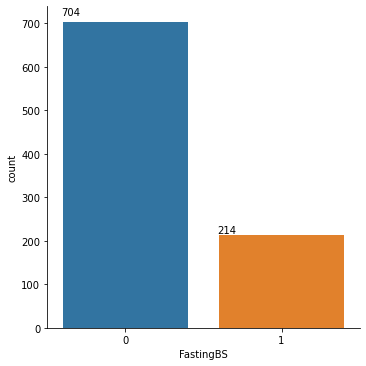

In [22]:
g=sns.catplot(x='FastingBS',kind='count',data=df)
ax=g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x()-0.01,p.get_height()*1.02,p.get_height(),color='black')

In [31]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

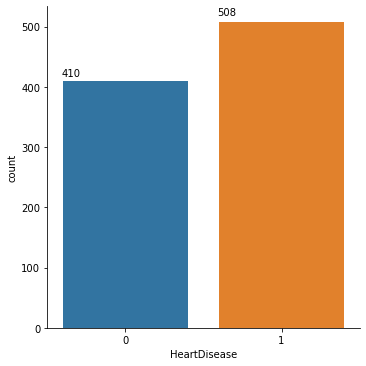

In [23]:
g=sns.catplot(x='HeartDisease',kind='count',data=df)
ax=g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x()-0.01,p.get_height()*1.02,p.get_height(),color='black')

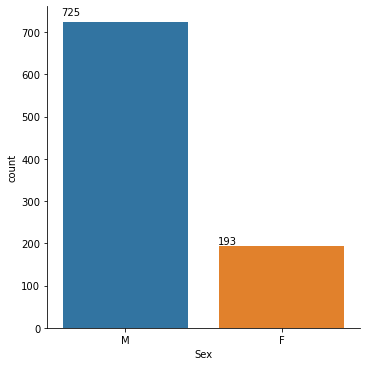

In [29]:
g=sns.catplot(x='Sex',kind='count',data=df)
ax=g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x()-0.01,p.get_height()*1.02,p.get_height(),color='black')

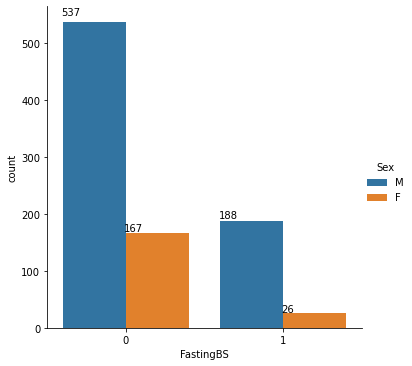

In [25]:
g=sns.catplot(x='FastingBS',hue='Sex',kind='count',data=df)
ax=g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x()-0.01,p.get_height()*1.02,p.get_height(),color='black')#188/725=26%,26/193=13.5% males have higer risk of bs

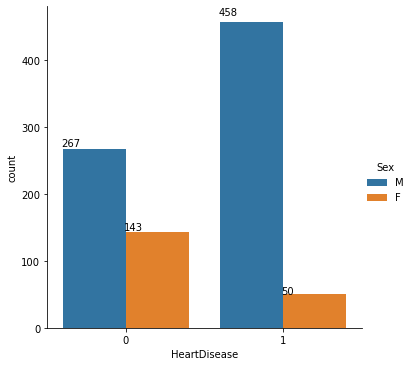

In [27]:
g=sns.catplot(x='HeartDisease',hue='Sex',kind='count',data=df)
ax=g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x()-0.01,p.get_height()*1.02,p.get_height(),color='black') #458/725=63%, 50/193=26% males have higher risk of heart diseae

In [30]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [119]:
df1=df.copy()

In [120]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [124]:
sex_e=pd.get_dummies(df1.Sex)
df1=df1.join(sex_e)
#print(Sex_e.columns)
#print(sex_M)
excer_e=pd.get_dummies(df1.ExerciseAngina)
df1=df1.join(excer_e)

#excer_e.columns=['excer_'+str(col) for col in excer_e.columns]
#print(excer_e.columns)
#df1=pd.concat([df1,Sex_e])


    
    

    

ValueError: columns overlap but no suffix specified: Index(['F', 'M'], dtype='object')

In [125]:
excer_e=pd.get_dummies(df1.ExerciseAngina)
df1=df1.join(excer_e)

In [127]:
df1.drop(['Sex','ExerciseAngina'],axis=1,inplace=True)

In [131]:
l1=LabelEncoder()
df1['ChestPainType']=l1.fit_transform(df1['ChestPainType'])
l2=LabelEncoder()
df1['RestingECG']=l2.fit_transform(df1['RestingECG'])
l3=LabelEncoder()
df1['ST_Slope']=l3.fit_transform(df1['ST_Slope'])


In [132]:
df1.head(50)

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,F,M,N,Y
0,40,1,140,289,0,1,172,0.0,2,0,0,1,1,0
1,49,2,160,180,0,1,156,1.0,1,1,1,0,1,0
2,37,1,130,283,0,2,98,0.0,2,0,0,1,1,0
3,48,0,138,214,0,1,108,1.5,1,1,1,0,0,1
4,54,2,150,195,0,1,122,0.0,2,0,0,1,1,0
5,39,2,120,339,0,1,170,0.0,2,0,0,1,1,0
6,45,1,130,237,0,1,170,0.0,2,0,1,0,1,0
7,54,1,110,208,0,1,142,0.0,2,0,0,1,1,0
8,37,0,140,207,0,1,130,1.5,1,1,0,1,0,1
9,48,1,120,284,0,1,120,0.0,2,0,1,0,1,0


df.head()

In [133]:
df1.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,F,M,N,Y
0,40,1,140,289,0,1,172,0.0,2,0,0,1,1,0
1,49,2,160,180,0,1,156,1.0,1,1,1,0,1,0
2,37,1,130,283,0,2,98,0.0,2,0,0,1,1,0
3,48,0,138,214,0,1,108,1.5,1,1,1,0,0,1
4,54,2,150,195,0,1,122,0.0,2,0,0,1,1,0


In [134]:
from sklearn.model_selection import train_test_split

In [136]:
df1_out=df1['HeartDisease']
df1=df1.drop(['HeartDisease'],axis=1)

In [138]:
df1_out.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [139]:
x_train,x_test,y_train,y_test=train_test_split(df1,df1_out,test_size=0.2,random_state=20)

In [150]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(512,activation=tf.nn.relu),
                           tf.keras.layers.Dense(2,activation=tf.nn.softmax)])
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
23/23 [==============================] - 0s 1ms/step - loss: 3.1512 - accuracy: 0.5681
Epoch 2/20
23/23 [==============================] - 0s 1ms/step - loss: 0.9479 - accuracy: 0.6962
Epoch 3/20
23/23 [==============================] - 0s 1ms/step - loss: 0.5245 - accuracy: 0.7411
Epoch 4/20
23/23 [==============================] - 0s 1ms/step - loss: 0.5395 - accuracy: 0.7507
Epoch 5/20
23/23 [==============================] - 0s 1ms/step - loss: 0.4705 - accuracy: 0.7820
Epoch 6/20
23/23 [==============================] - 0s 1ms/step - loss: 0.4715 - accuracy: 0.7970
Epoch 7/20
23/23 [==============================] - 0s 1ms/step - loss: 0.4881 - accuracy: 0.7861
Epoch 8/20
23/23 [==============================] - ETA: 0s - loss: 0.3485 - accuracy: 0.84 - 0s 1ms/step - loss: 0.5281 - accuracy: 0.7861
Epoch 9/20
23/23 [==============================] - 0s 1ms/step - loss: 0.4847 - accuracy: 0.8079
Epoch 10/20
23/23 [==============================] - 0s 1ms/step - loss: 0.5

In [151]:
model.fit(x_train,y_train,epochs=14)

Epoch 1/14
23/23 [==============================] - 0s 1ms/step - loss: 0.4544 - accuracy: 0.8106
Epoch 2/14
23/23 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.8406
Epoch 3/14
23/23 [==============================] - 0s 1ms/step - loss: 0.4085 - accuracy: 0.8420
Epoch 4/14
23/23 [==============================] - 0s 1ms/step - loss: 0.5747 - accuracy: 0.7888
Epoch 5/14
23/23 [==============================] - 0s 1ms/step - loss: 0.5415 - accuracy: 0.7875
Epoch 6/14
23/23 [==============================] - ETA: 0s - loss: 1.1251 - accuracy: 0.75 - 0s 1ms/step - loss: 0.6562 - accuracy: 0.7670
Epoch 7/14
23/23 [==============================] - 0s 1ms/step - loss: 0.7439 - accuracy: 0.7561
Epoch 8/14
23/23 [==============================] - 0s 1ms/step - loss: 0.4822 - accuracy: 0.8025
Epoch 9/14
23/23 [==============================] - 0s 1ms/step - loss: 0.4869 - accuracy: 0.8038
Epoch 10/14
23/23 [==============================] - 0s 1ms/step - loss: 0.3

In [163]:
arra=model.predict(x_test)

In [165]:
y_testt=pd.DataFrame(arra)

In [169]:
len(x_test)

184

In [176]:

y_testt=y_testt.drop([0,1],axis=1)

In [172]:
y_testt['HeartDisease']=y_testt[1]>0.5
        

In [178]:
y_testt['HeartDisease']=y_testt['HeartDisease'].astype(int)

In [181]:
from sklearn.metrics import accuracy_score

In [182]:
accuracy_score(y_test,y_testt,normalize=False)

153

In [183]:
153/184

0.8315217391304348